# Heart Disease Binary Classifier using Random Forests

In [36]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [3]:
#Reading the data
data = pd.read_csv(r"D:\AI-Datasets\random-forests\heart.csv")
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
#getting necessary inference
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
#identifying the categorical and numerical columns
for i in data.columns:
    print(data[i].unique())

[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
[1 0]
[3 2 1 0]
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
[1 0]
[0 1 2]
[150 187 172 178 163 148 1

In [27]:
cat_data_column_names = ["sex","cp","fbs","thal","ca","slope","exang"]
cat_col = data[cat_data_column_names]
numerical_column_names = list(set(data.columns)-set(cat_data_column_names))
num_cols = data[numerical_column_names]

           thalach       age   restecg   oldpeak      chol  trestbps    target
thalach   1.000000 -0.398522  0.044123 -0.344187 -0.009940 -0.046698  0.421741
age      -0.398522  1.000000 -0.116211  0.210013  0.213678  0.279351 -0.225439
restecg   0.044123 -0.116211  1.000000 -0.058770 -0.151040 -0.114103  0.137230
oldpeak  -0.344187  0.210013 -0.058770  1.000000  0.053952  0.193216 -0.430696
chol     -0.009940  0.213678 -0.151040  0.053952  1.000000  0.123174 -0.085239
trestbps -0.046698  0.279351 -0.114103  0.193216  0.123174  1.000000 -0.144931
target    0.421741 -0.225439  0.137230 -0.430696 -0.085239 -0.144931  1.000000


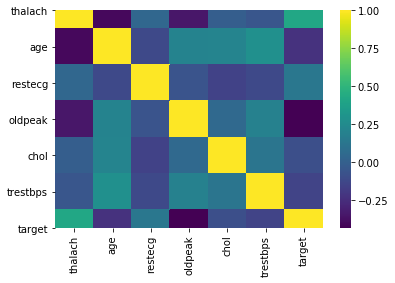

In [34]:
#corelation between the target and other numerical_column_features
corr = num_cols.corr()
print(corr)
#heatmap
sns.heatmap(corr,cmap="viridis",)


In [55]:
y = data["target"]
x = data.drop(["target"],axis=1)

In [56]:
#lets try without removing any features
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [57]:

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [58]:
pred = rf.predict(x_test)
cf = confusion_matrix(pred,y_test)
cf_report = classification_report(pred,y_test)
print(cf_report)

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       0.94      0.76      0.84        41

    accuracy                           0.80        61
   macro avg       0.79      0.83      0.79        61
weighted avg       0.84      0.80      0.81        61



In [59]:
pred = rf.predict(x_test)
cf = confusion_matrix(pred,y_test)
cf_report = classification_report(pred,y_test)
print(cf_report)
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,y_test)
print(acc)

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       0.94      0.76      0.84        41

    accuracy                           0.80        61
   macro avg       0.79      0.83      0.79        61
weighted avg       0.84      0.80      0.81        61

0.8032786885245902
